# NLP analysis for Website

## Obama article word cloud

In [6]:
import pickle
import networkx as nx

with open(f"obama_and_largest_conn_components/Obama.pickle", "rb") as file:
    obama_graph = pickle.load(file)

    G = obama_graph
    
# Get all "key phrases" node attribute values
key_phrases_obama = nx.get_node_attributes(G, 'key_phrases').values()
key_phrases_obama = list(set([phrase for phrases in key_phrases_obama for phrase in phrases]))
print(key_phrases_obama[:10])

flattened_string_obama = ' '.join(key_phrases_obama)

['multi-national division center reported a non-combat related death in baghdad sept 2', 'turkey has stepped up operations against pkk since the rebels attacked a turkish border outpost in october 3 and killed 17 soliders', 'black celebrity kids', "robinson-briggs abruptly fires plainfield's finance director", 'even the wicked get worse than they deserve', "she's commander of the alaskan national guard", "this is a global problem you can't just fix it here you have to fix it everywhere", 'now you have narco drug lords who are helping to finance the taliban', 'there are more things in heaven and earth horaito than are dreamt of in your philosophy', 'president obama is the only man i know who has the ability to truly repair the world']


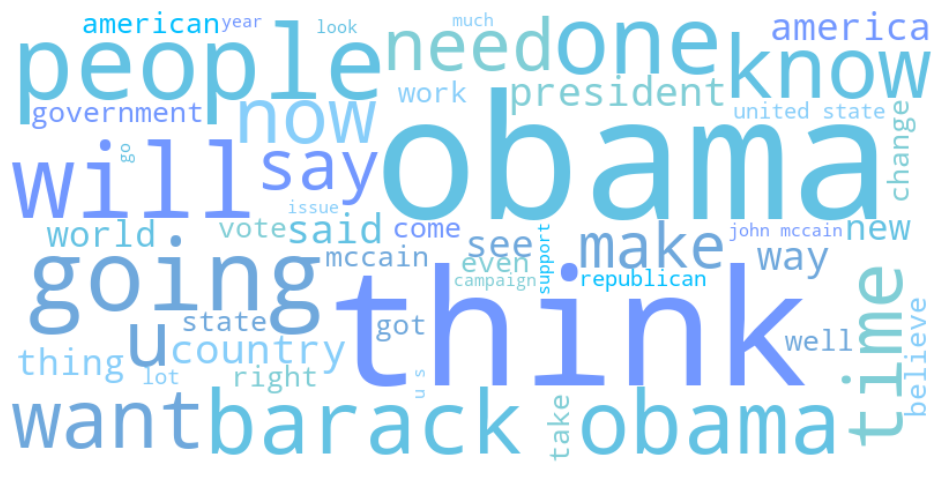

In [7]:
# Import necessary packages
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

colors = ['#7297ff', '#6fa8dc', '#63c2e3', '#80ced6', '#87cefa', '#00bfff']
cmap = mcolors.ListedColormap(colors)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white', stopwords=STOPWORDS,
                      min_font_size=10, max_font_size=150, colormap= cmap).generate(flattened_string_obama)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


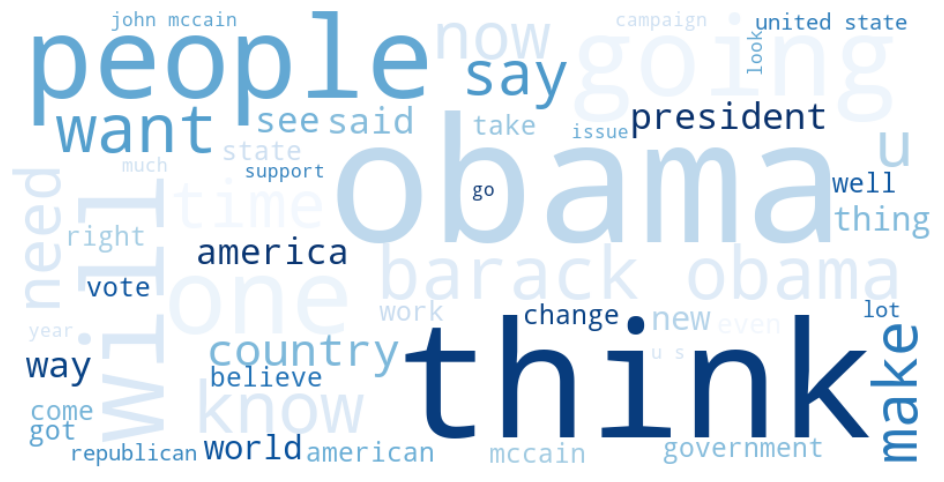

In [8]:
# Import necessary packages
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib as mpl

colors = ['#7297ff', '#6fa8dc', '#63c2e3', '#80ced6', '#87cefa', '#00bfff']
cmap = mcolors.ListedColormap(colors)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white', stopwords=STOPWORDS,
                      min_font_size=10, max_font_size=150, colormap= mpl.cm.Blues).generate(flattened_string_obama)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## MC Cain word cloud

First: rerun graph processing from Oliver (missing here) and extract the Mc Cain nodes (commented code below):

In [9]:
"""
# Now G contains the network created from the list

# Create a subgraph containing nodes with key phrases that contain "obama" or "Obama"
McCain_nodes = [node for node, attrs in G.nodes(data=True) if any("mccain" in phrase.lower() for phrase in attrs["key_phrases"])]
mccain_subgraph = G.subgraph(McCain_nodes)
graph_to_pickle = mccain_subgraph.copy()

import pickle

# Define filename for pickle file
filename = "mccain_subgraph.pickle"

# Write subgraph to pickle file
with open(filename, "wb") as file:
    pickle.dump(graph_to_pickle, file)
    
"""

'\n# Now G contains the network created from the list\n\n# Create a subgraph containing nodes with key phrases that contain "obama" or "Obama"\nMcCain_nodes = [node for node, attrs in G.nodes(data=True) if any("mccain" in phrase.lower() for phrase in attrs["key_phrases"])]\nmccain_subgraph = G.subgraph(McCain_nodes)\ngraph_to_pickle = mccain_subgraph.copy()\n\nimport pickle\n\n# Define filename for pickle file\nfilename = "mccain_subgraph.pickle"\n\n# Write subgraph to pickle file\nwith open(filename, "wb") as file:\n    pickle.dump(graph_to_pickle, file)\n    \n'

['i was just kidding', "senator mccain has said he will protect bush's tax cuts for big corporations and has proposed nothing to bolster the economic condition of ohio's middle class"]


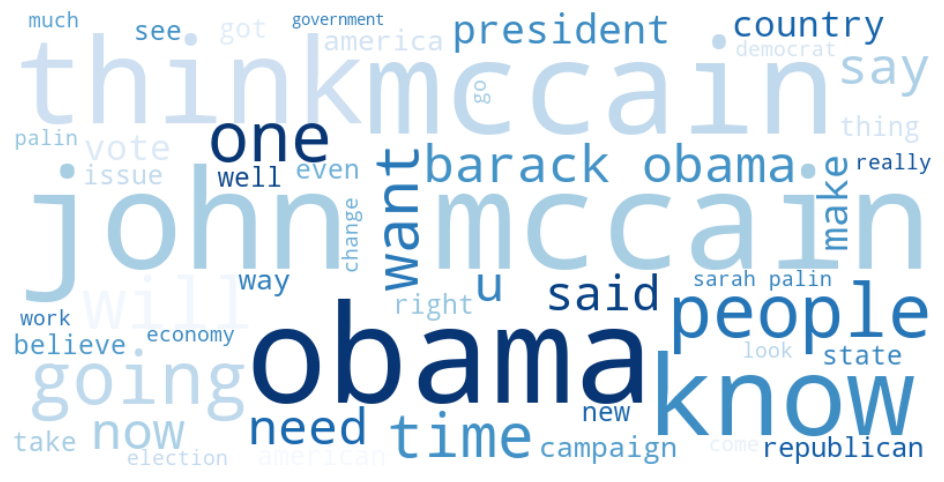

In [10]:
with open('mccain_subgraph.pickle', 'rb') as file:
    G = pickle.load(file)
    
# Get all "key phrases" node attribute values
key_phrases_mccain = nx.get_node_attributes(G, 'key_phrases').values()
key_phrases_mccain = list(set([phrase.lower() for phrases in key_phrases_mccain for phrase in phrases]))
print(key_phrases_mccain[:2])

flattened_string_mccain = ' '.join(key_phrases_mccain)

# Import necessary packages
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib as mpl

colors = ['#7297ff', '#6fa8dc', '#63c2e3', '#80ced6', '#87cefa', '#00bfff']
cmap = mcolors.ListedColormap(colors)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white', stopwords=STOPWORDS,
                      min_font_size=10, max_font_size=150, colormap= mpl.cm.Blues).generate(flattened_string_mccain)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word cloud of largest connected components

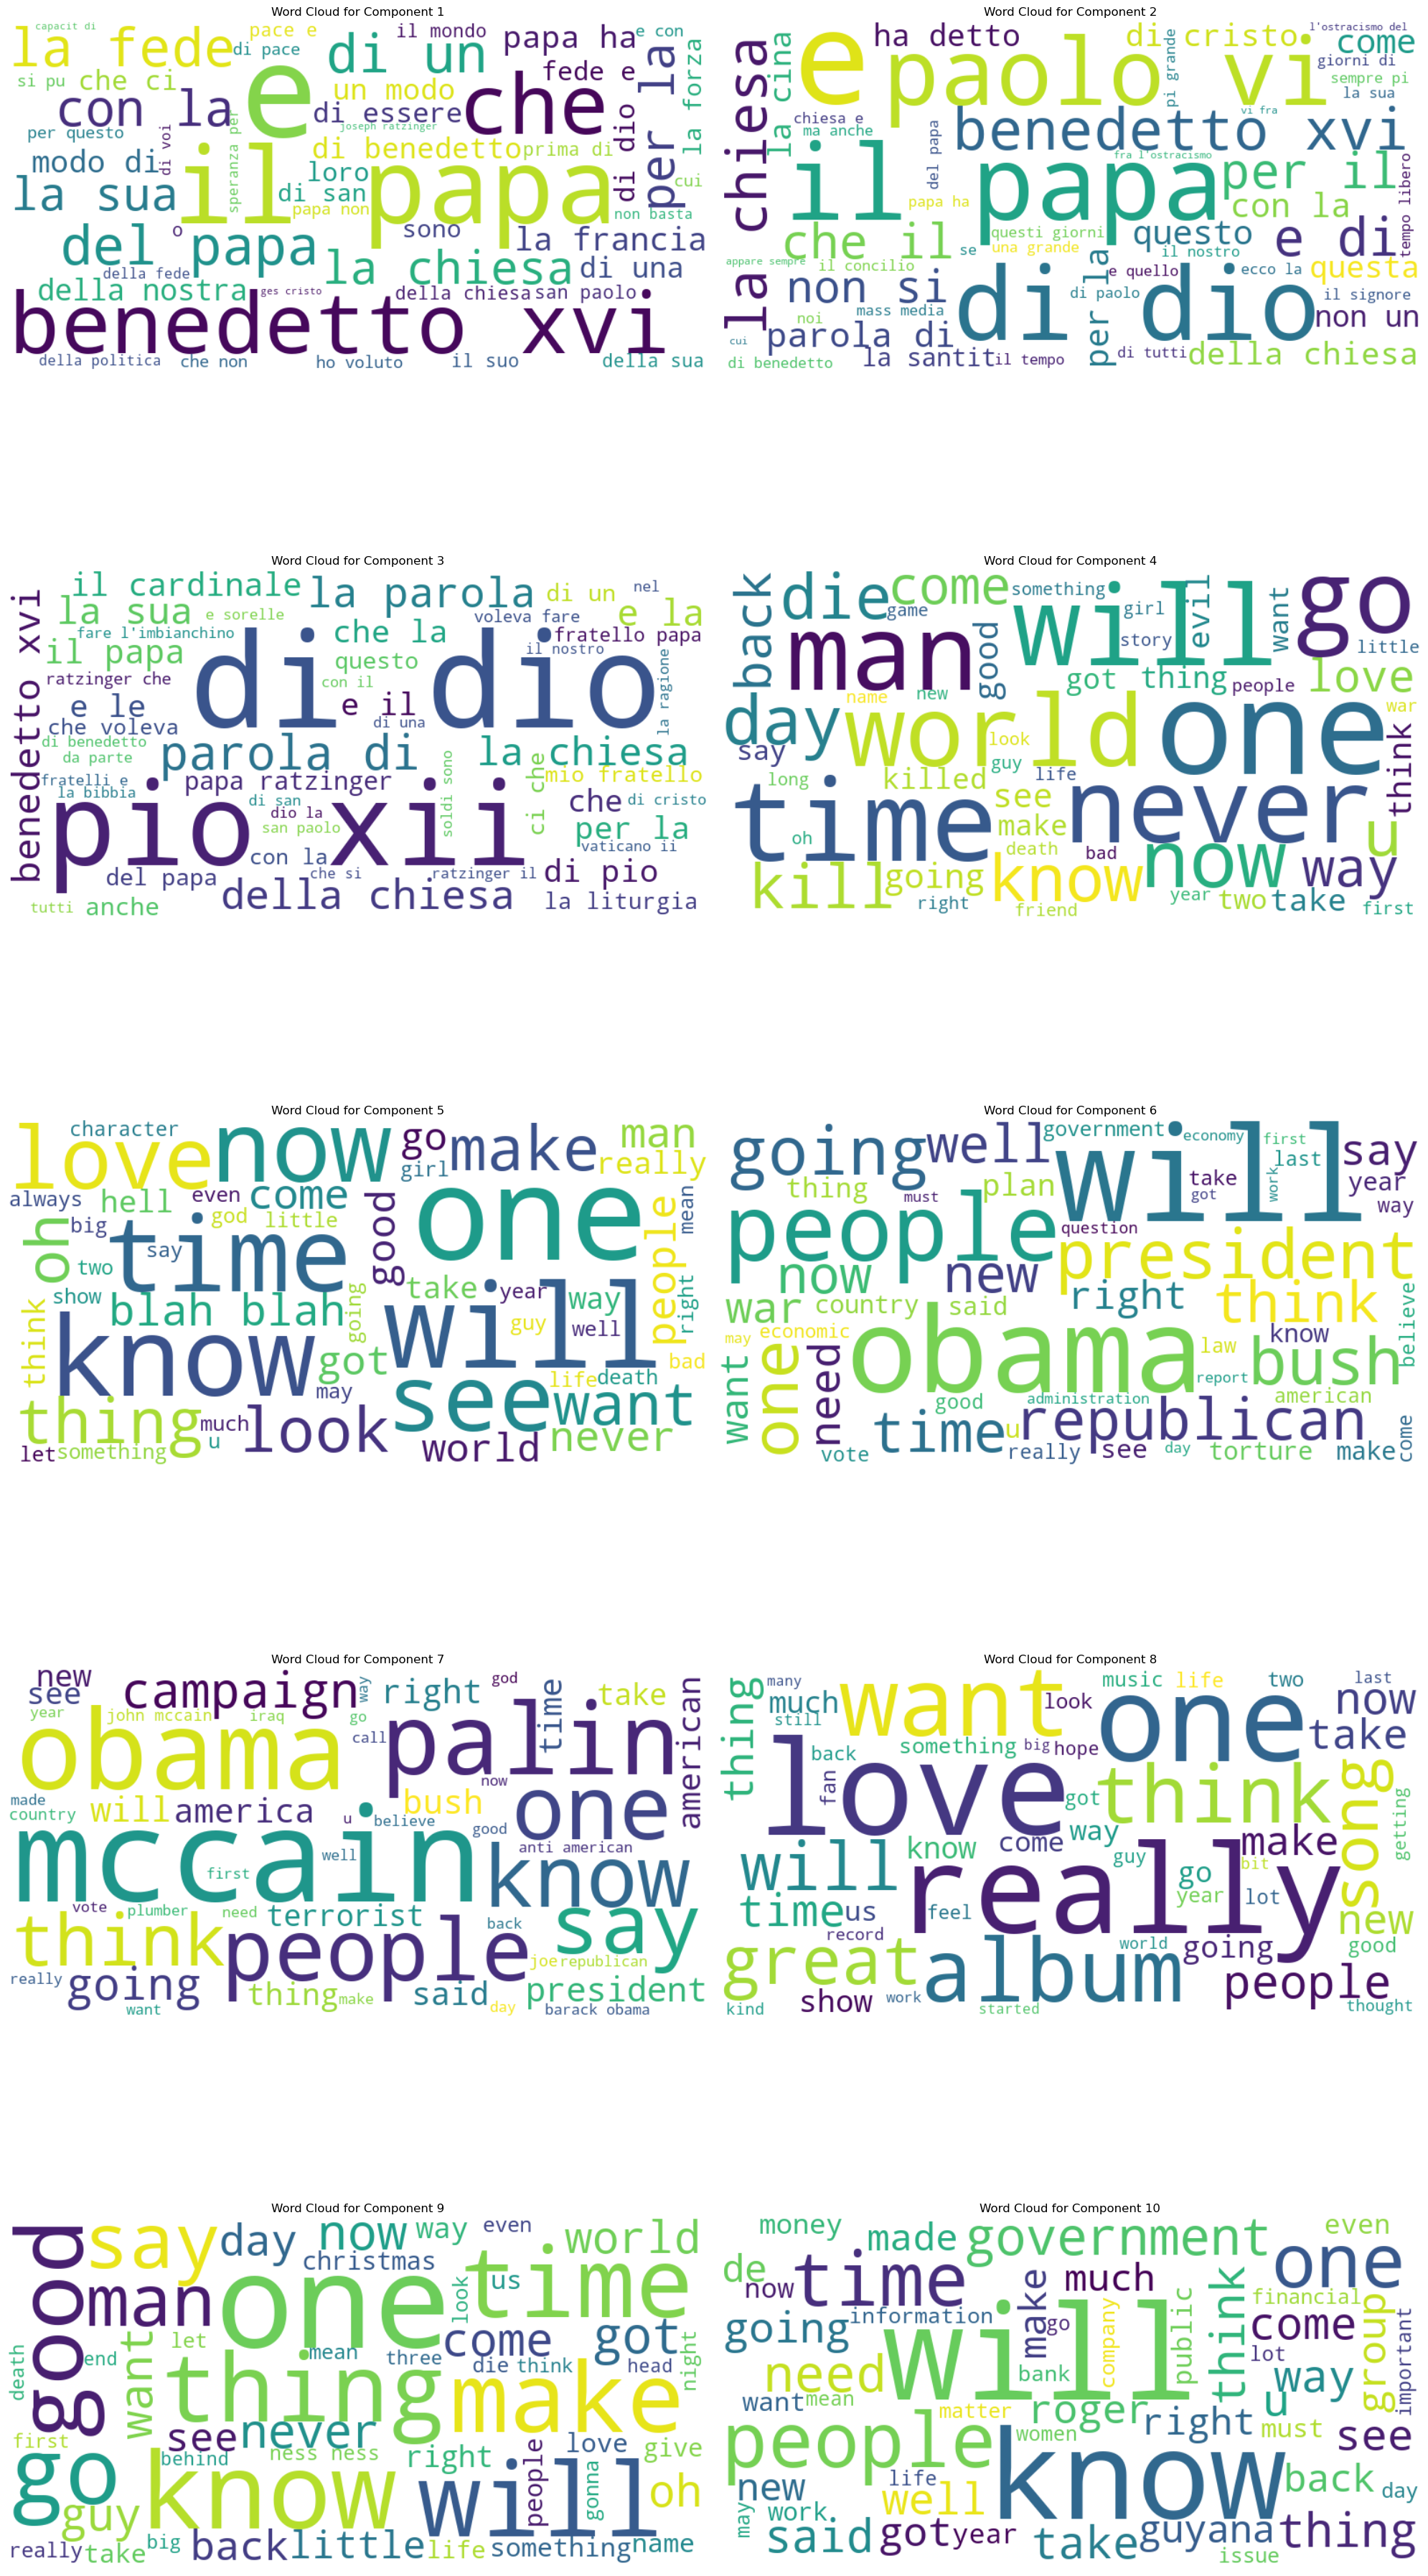

In [12]:
from wordcloud import WordCloud

# Assuming G is your NetworkX directed graph object
connected_components = sorted(nx.weakly_connected_components(G), key=len, reverse=True)

# Create a function to generate word clouds
def generate_wordcloud(component, index):
    subgraph = G.subgraph(component)
    key_phrases = [node_attr['key_phrases'] for _, node_attr in subgraph.nodes(data=True)]
    key_phrases_flat = [phrase for phrases in key_phrases for phrase in phrases]
    flattened_string = ' '.join(key_phrases_flat)

    wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white',
                          min_font_size=10, max_font_size=150).generate(flattened_string)

    plt.subplot(5, 2, index + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Component {index + 1}")

# Display the word clouds for the 10 largest connected components
plt.figure(figsize=(20, 40))
for i, component in enumerate(connected_components[:10]):
    generate_wordcloud(component, i)
plt.tight_layout()
plt.show()

In [17]:
import nltk
from textblob import TextBlob
import networkx as nx
from math import log

nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load stop words for English, Italian, Spanish, French, and German
stop_words = set(stopwords.words(['english', 'italian', 'spanish', 'french', 'german']))

# Assuming G is your NetworkX directed graph object
connected_components = sorted(nx.weakly_connected_components(G), key=len, reverse=True)

# Function to calculate normalized sentiment score
def calculate_normalized_sentiment_score(component):
    subgraph = G.subgraph(component)
    key_phrases = [node_attr['key_phrases'] for _, node_attr in subgraph.nodes(data=True)]
    key_phrases_flat = [phrase for phrases in key_phrases for phrase in phrases]
    flattened_string = ' '.join(key_phrases_flat)

    sentiment_score = TextBlob(flattened_string).sentiment.polarity

    tokens = nltk.word_tokenize(flattened_string)
    non_stopwords = [word for word in tokens if word.lower() not in stop_words]
    non_stopword_count = len(non_stopwords)

    if non_stopword_count not in [0, 1]:
        log_non_stopword_count = log(non_stopword_count)
        normalized_sentiment_score = sentiment_score / log_non_stopword_count
    else:
        normalized_sentiment_score = sentiment_score

    return normalized_sentiment_score

# Calculate normalized sentiment scores for the 5 largest connected components
normalized_sentiment_scores = [calculate_normalized_sentiment_score(component) for component in connected_components[:10]]

for i, score in enumerate(normalized_sentiment_scores):
    print(f"Normalized sentiment score for the largest connected component {i+1}: {score}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Normalized sentiment score for the largest connected component 1: 0.00861189360483029
Normalized sentiment score for the largest connected component 2: 0.001391374298237542
Normalized sentiment score for the largest connected component 3: 0.0033647744612471425
Normalized sentiment score for the largest connected component 4: 0.00484161404902614
Normalized sentiment score for the largest connected component 5: 0.004469237072356382
Normalized sentiment score for the largest connected component 6: 0.007367005211091238
Normalized sentiment score for the largest connected component 7: 0.009319071149142934
Normalized sentiment score for the largest connected component 8: 0.02145749328942404
Normalized sentiment score for the largest connected component 9: 0.00505756181474873
Normalized sentiment score for the largest connected component 10: 0.008081341063130566
